In [1]:
import math
import pickle
import copy
import gzip
import pandas as pd
import numpy as np
from pymatgen.util import coord
from pymatgen.io.ase import AseAtomsAdaptor
from ase.visualize.plot import plot_atoms
from matplotlib import pyplot as plt
from pymatgen.core.structure import Structure
from pymatgen.core.periodic_table import Element
from pymatgen.core.sites import Site

In [59]:
with gzip.open('data.pickle.gz', 'rb') as fh:
    df = pickle.load(fh, )

In [62]:
data3 = pd.DataFrame()
data3 = df.copy()
for i, d in data3.iterrows():
    if((len(d.defect_representation) > 1) or (d.defect_representation[0].species_string  != 'W')):
        data3 = data3.drop(i, axis = 0)
data3 = data3.set_index(pd.Index([0]))
data3

descriptor_id       energy  energy_per_atom  fermi_level  \
0  6141cf15c819ca30b196b471 -1400.023811        -7.291791    -0.194139   

     homo    lumo                      defect_representation  \
0 -0.7016  1.0985  [[-3.19031557 12.89350732  3.719751  ] W]   

   formation_energy                                  initial_structure  \
0          0.166689  [[1.27612629e-07 1.84192955e+00 3.71975100e+00...   

   formation_energy_per_site  band_gap  
0                   0.166689    1.8001

In [63]:
data3.iloc[0].initial_structure.replace(63, Element('Mo'))

In [64]:
data3.to_pickle('emptydata.pkl')

In [41]:
data = pd.read_pickle('emptydata.pkl')

In [42]:
data

descriptor_id       energy  energy_per_atom  fermi_level  \
0  6141cf15c819ca30b196b471 -1400.023811        -7.291791    -0.194139   

     homo    lumo                      defect_representation  \
0 -0.7016  1.0985  [[-3.19031557 12.89350732  3.719751  ] W]   

   formation_energy                                  initial_structure  \
0          0.166689  [[1.27612629e-07 1.84192955e+00 3.71975100e+00...   

   formation_energy_per_site  band_gap  
0                   0.166689    1.8001

In [44]:
data.iloc[0].initial_structure.replace(0, Element('W'))
data.iloc[0].defect_representation[0] = data.iloc[0].initial_structure[0]
for i in range(1, 64):
    data1 = pd.read_pickle('emptydata.pkl')
    data1.iloc[0].initial_structure.replace(i, Element('W'))
    data1.iloc[0].defect_representation[0] = data1.iloc[0].initial_structure[i]
    data = pd.concat([data, data1])

In [45]:
for i in range(64):
    print(list(data.iloc[i].initial_structure), end='\n\n')

[PeriodicSite: W (0.0000, 1.8419, 3.7198) [0.0417, 0.0833, 0.2500], PeriodicSite: Mo (-1.5952, 4.6048, 3.7198) [0.0417, 0.2083, 0.2500], PeriodicSite: Mo (-3.1903, 7.3677, 3.7198) [0.0417, 0.3333, 0.2500], PeriodicSite: Mo (-4.7855, 10.1306, 3.7198) [0.0417, 0.4583, 0.2500], PeriodicSite: Mo (-6.3806, 12.8935, 3.7198) [0.0417, 0.5833, 0.2500], PeriodicSite: Mo (-7.9758, 15.6564, 3.7198) [0.0417, 0.7083, 0.2500], PeriodicSite: Mo (-9.5709, 18.4193, 3.7198) [0.0417, 0.8333, 0.2500], PeriodicSite: Mo (-11.1661, 21.1822, 3.7198) [0.0417, 0.9583, 0.2500], PeriodicSite: Mo (3.1903, 1.8419, 3.7198) [0.1667, 0.0833, 0.2500], PeriodicSite: Mo (1.5952, 4.6048, 3.7198) [0.1667, 0.2083, 0.2500], PeriodicSite: Mo (0.0000, 7.3677, 3.7198) [0.1667, 0.3333, 0.2500], PeriodicSite: Mo (-1.5952, 10.1306, 3.7198) [0.1667, 0.4583, 0.2500], PeriodicSite: Mo (-4.7855, 15.6564, 3.7198) [0.1667, 0.7083, 0.2500], PeriodicSite: Mo (-6.3806, 18.4193, 3.7198) [0.1667, 0.8333, 0.2500], PeriodicSite: Mo (-7.9758, 21

In [46]:
data

descriptor_id       energy  energy_per_atom  fermi_level  \
0   6141cf15c819ca30b196b471 -1400.023811        -7.291791    -0.194139   
0   6141cf15c819ca30b196b471 -1400.023811        -7.291791    -0.194139   
0   6141cf15c819ca30b196b471 -1400.023811        -7.291791    -0.194139   
0   6141cf15c819ca30b196b471 -1400.023811        -7.291791    -0.194139   
0   6141cf15c819ca30b196b471 -1400.023811        -7.291791    -0.194139   
..                       ...          ...              ...          ...   
0   6141cf15c819ca30b196b471 -1400.023811        -7.291791    -0.194139   
0   6141cf15c819ca30b196b471 -1400.023811        -7.291791    -0.194139   
0   6141cf15c819ca30b196b471 -1400.023811        -7.291791    -0.194139   
0   6141cf15c819ca30b196b471 -1400.023811        -7.291791    -0.194139   
0   6141cf15c819ca30b196b471 -1400.023811        -7.291791    -0.194139   

      homo    lumo                              defect_representation  \
0  -0.7016  1.0985  [[1.27612629e-07 1.84192955e+00 3.71975100e+00...   
0  -0.7016  1.0985          [[-1.59515772  4.604824    3.719751  ] W]   
0  -0.7016  1.0985          [[-3.19031561  7.36771851  3.719751  ] W]   
0  -0.7016  1.0985          [[-4.78547342 10.13061288  3.719751  ] W]   
0  -0.7016  1.0985          [[-6.38063127 12.89350732  3.719751  ] W]   
..     ...     ...                                                ...   
0  -0.7016  1.0985          [[15.95157863 12.89350732  3.719751  ] W]   
0  -0.7016  1.0985          [[14.35642078 15.65640177  3.719751  ] W]   
0  -0.7016  1.0985          [[12.76126293 18.41929621  3.719751  ] W]   
0  -0.7016  1.0985          [[11.16610508 21.18219065  3.719751  ] W]   
0  -0.7016  1.0985          [[-3.19031557 12.89350732  3.719751  ] W]   

    formation_energy                                  initial_structure  \
0           0.166689  [[1.27612629e-07 1.84192955e+00 3.71975100e+00...   
0           0.166689  [[1.27612629e-07 1.84192955e+00 3.71975100e+00...   
0           0.166689  [[1.27612629e-07 1.84192955e+00 3.71975100e+00...   
0           0.166689  [[1.27612629e-07 1.84192955e+00 3.71975100e+00...   
0           0.166689  [[1.27612629e-07 1.84192955e+00 3.71975100e+00...   
..               ...                                                ...   
0           0.166689  [[1.27612629e-07 1.84192955e+00 3.71975100e+00...   
0           0.166689  [[1.27612629e-07 1.84192955e+00 3.71975100e+00...   
0           0.166689  [[1.27612629e-07 1.84192955e+00 3.71975100e+00...   
0           0.166689  [[1.27612629e-07 1.84192955e+00 3.71975100e+00...   
0           0.166689  [[1.27612629e-07 1.84192955e+00 3.71975100e+00...   

    formation_energy_per_site  band_gap  
0                    0.166689    1.8001  
0                    0.166689    1.8001  
0                    0.166689    1.8001  
0                    0.166689    1.8001  
0                    0.166689    1.8001  
..                        ...       ...  
0                    0.166689    1.8001  
0                    0.166689    1.8001  
0                    0.166689    1.8001  
0                    0.166689    1.8001  
0                    0.166689    1.8001  

[64 rows x 11 columns]

<ipython-input-47-7db40f0f9858>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


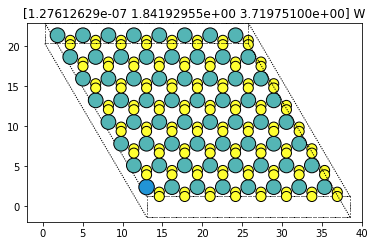

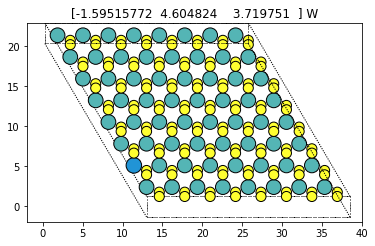

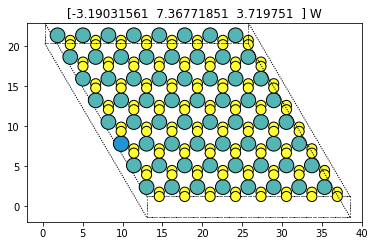

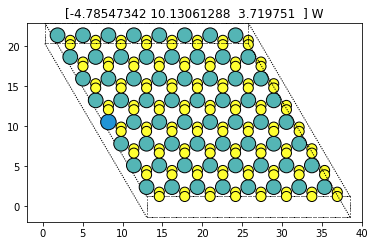

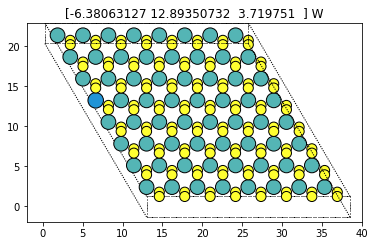

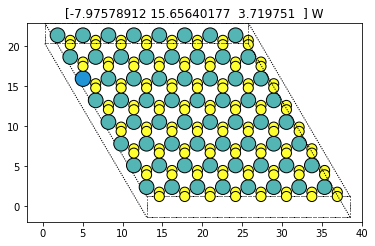

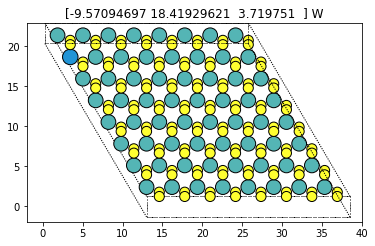

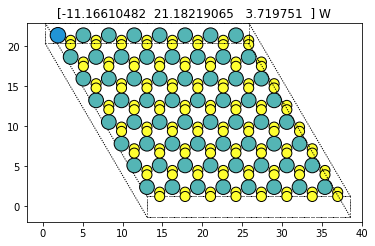

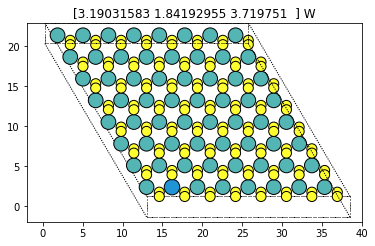

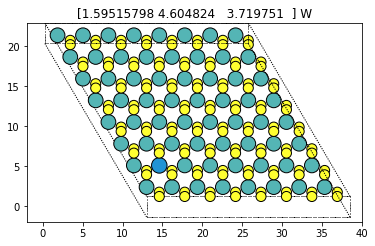

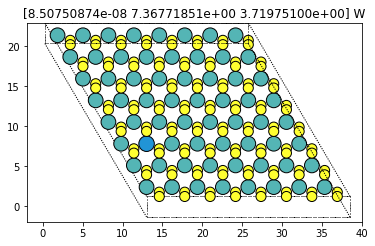

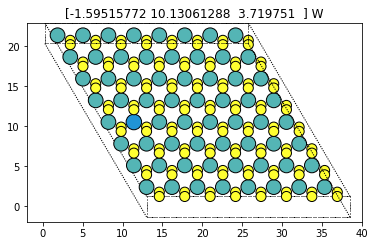

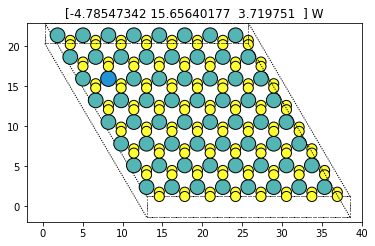

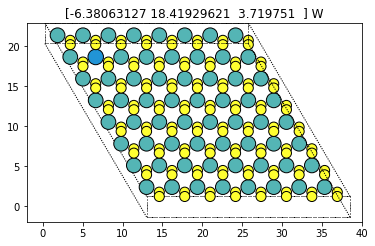

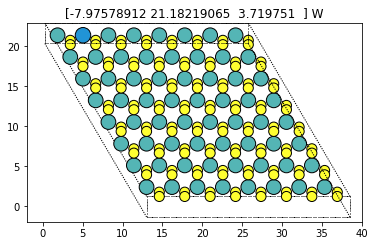

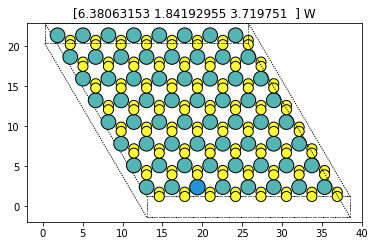

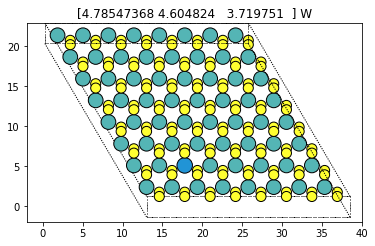

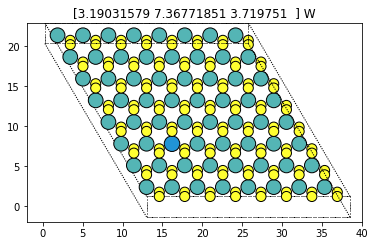

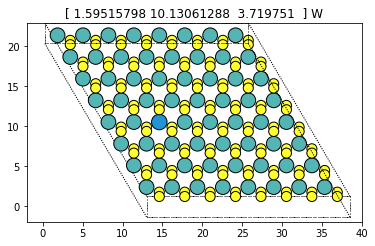

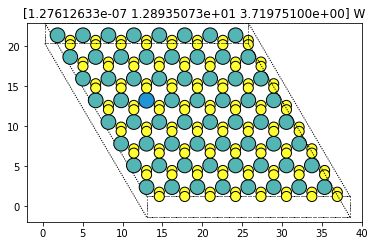

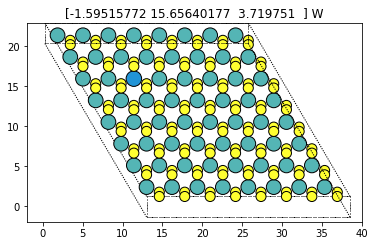

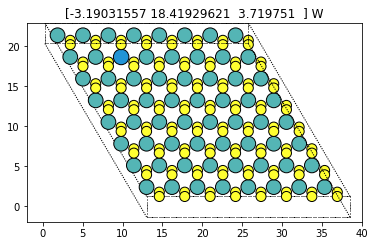

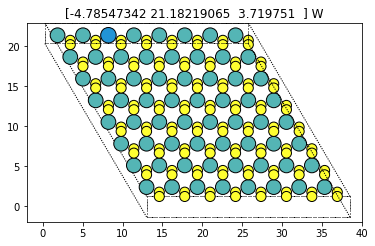

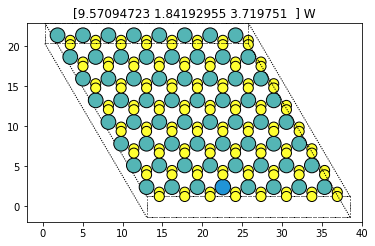

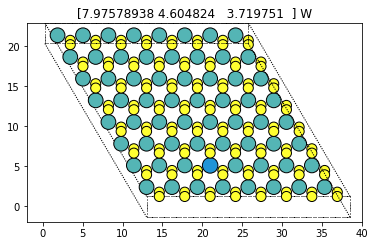

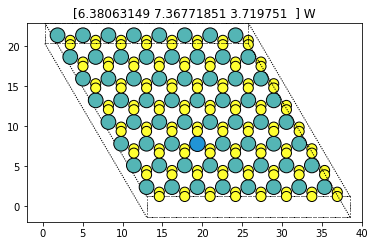

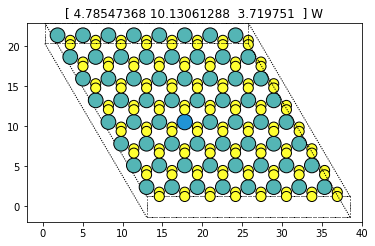

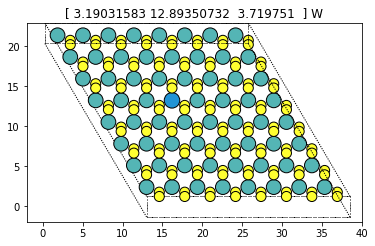

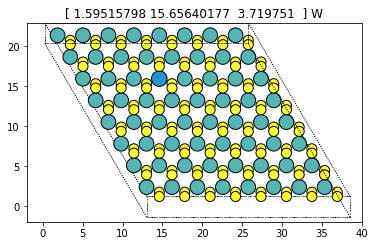

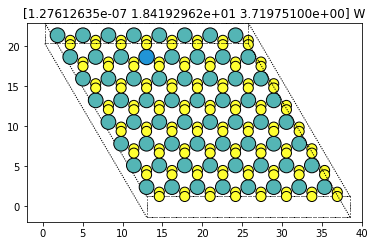

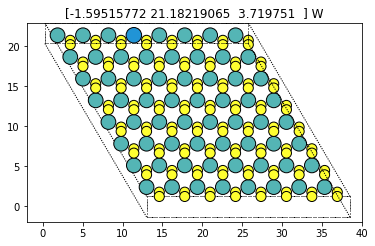

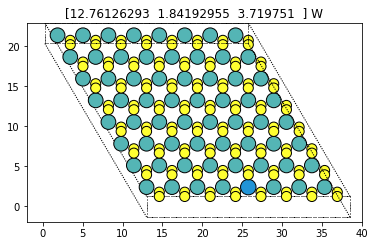

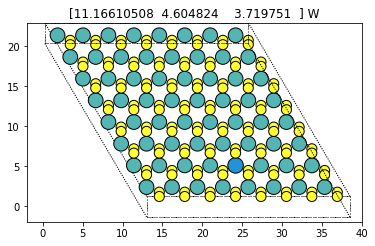

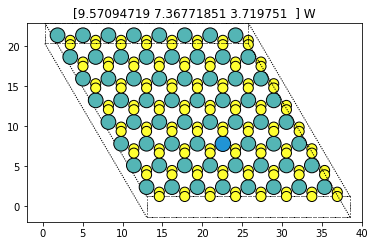

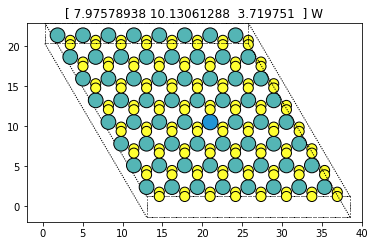

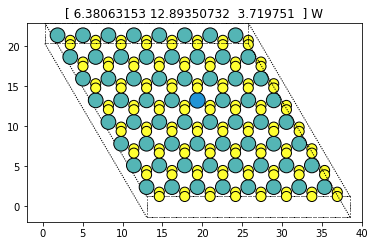

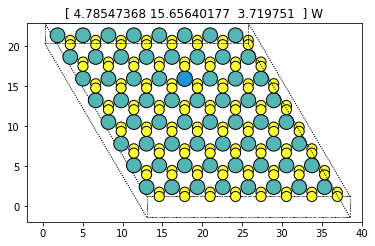

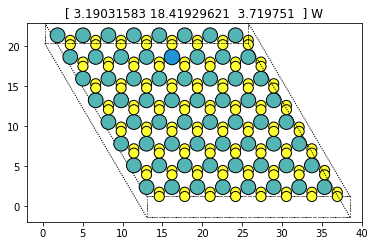

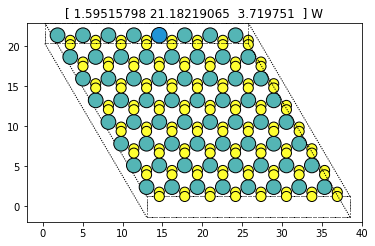

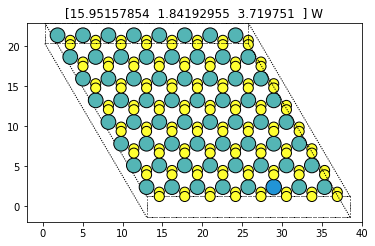

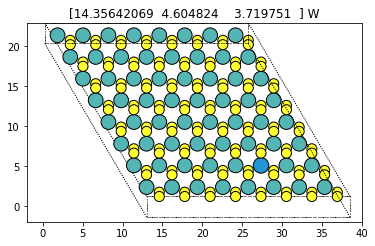

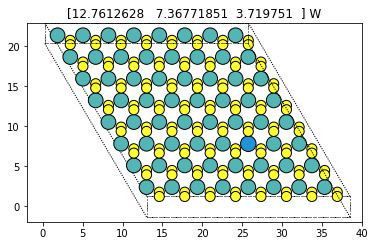

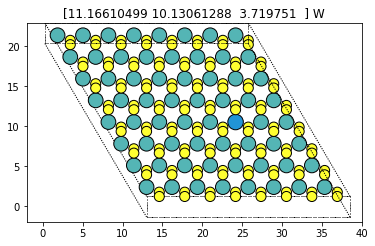

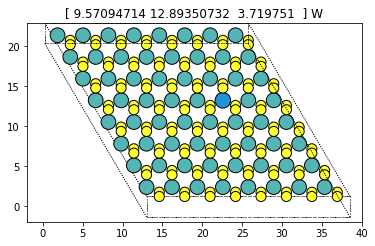

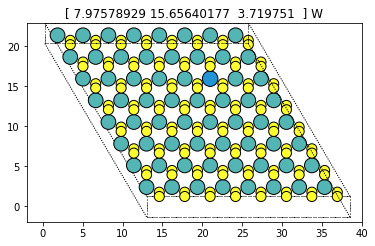

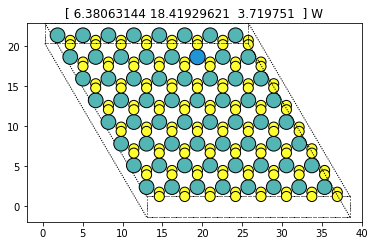

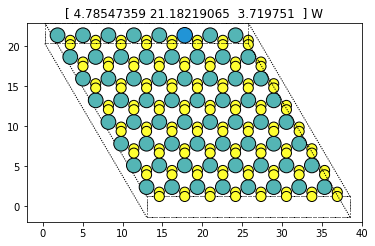

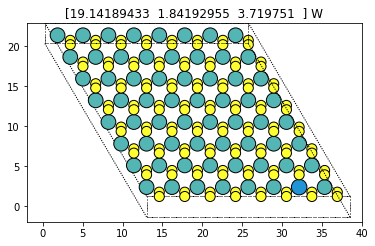

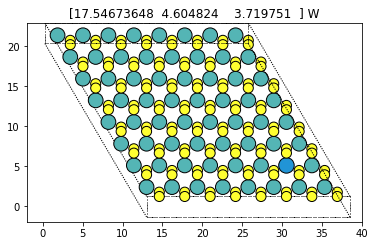

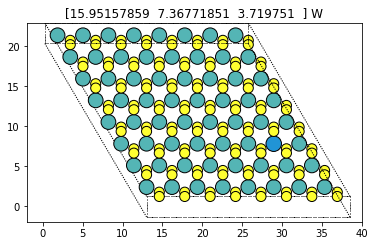

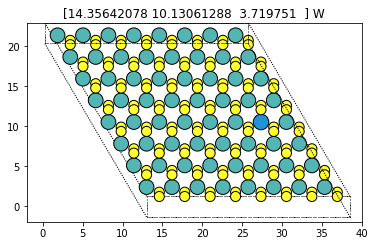

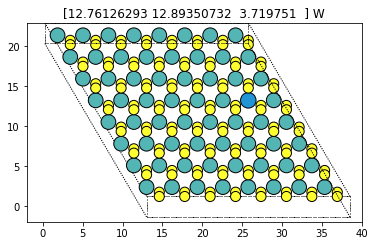

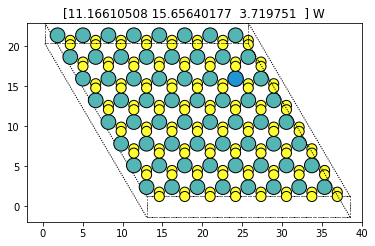

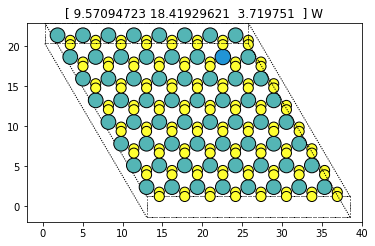

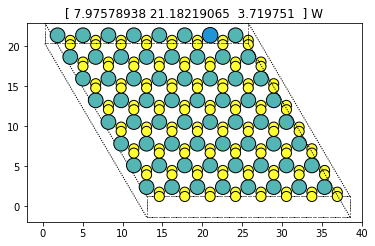

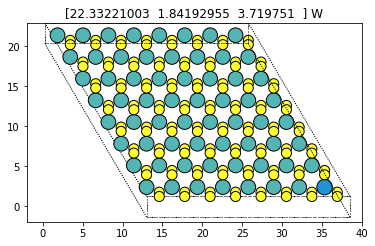

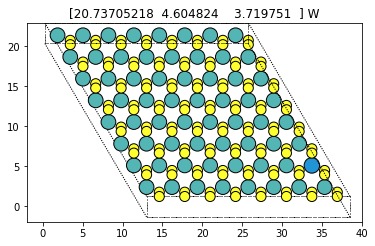

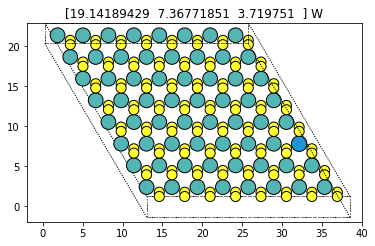

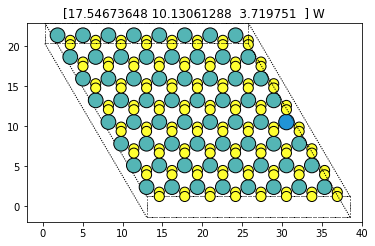

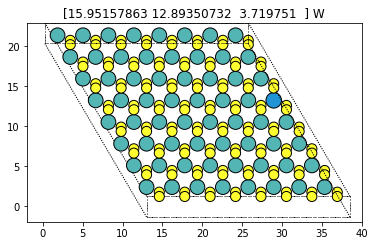

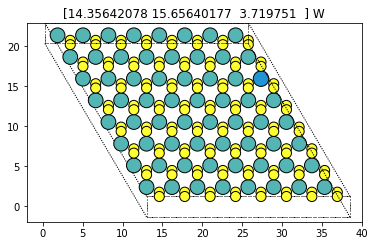

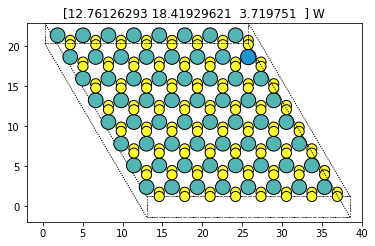

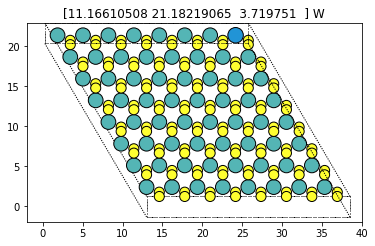

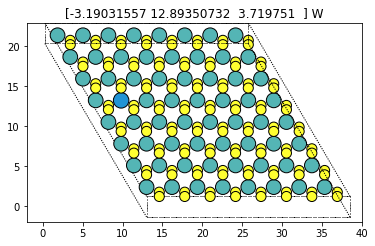

In [47]:
for i, d in data.iterrows():
    s0 = d.initial_structure
    d0 = d.defect_representation[0]
    ase_atoms = AseAtomsAdaptor.get_atoms(s0)
    fig, ax = plt.subplots()
    plot_atoms(ase_atoms, ax, radii=0.6, rotation=('10x, 0y, 0z'), show_unit_cell=True)
    xlim = 40
    ylim = 23
    ax.set_xlim(-2, xlim)
    ax.set_ylim(-2, ylim)
    ax.set_title(f'{d0}')

In [48]:
def Reformat_x(x):
    if x[0].coords[0] > 0:
        return math.floor(x[0].coords[0] / 1.59) + 7
    else:
        return math.floor(x[0].coords[0] / 1.59) + 8

def Reformat_y(x):
    return math.floor(x[0].coords[1] / 2.77)

In [49]:
list_coords = []
list_coord_x = data.defect_representation.apply(lambda x: Reformat_x(x)).to_list()    
# print(list_coord_x)
list_coord_y = data.defect_representation.apply(lambda x: Reformat_y(x)).to_list()    
# print(list_coord_y)
list_coord = []
for i in range(len(list_coord_x)):
    list_coord.append([list_coord_x[i],list_coord_y[i]])
# print(list_coord)

In [50]:
data["defect_coords"] = list_coord
data.head(5)

descriptor_id       energy  energy_per_atom  fermi_level  \
0  6141cf15c819ca30b196b471 -1400.023811        -7.291791    -0.194139   
0  6141cf15c819ca30b196b471 -1400.023811        -7.291791    -0.194139   
0  6141cf15c819ca30b196b471 -1400.023811        -7.291791    -0.194139   
0  6141cf15c819ca30b196b471 -1400.023811        -7.291791    -0.194139   
0  6141cf15c819ca30b196b471 -1400.023811        -7.291791    -0.194139   

     homo    lumo                              defect_representation  \
0 -0.7016  1.0985  [[1.27612629e-07 1.84192955e+00 3.71975100e+00...   
0 -0.7016  1.0985          [[-1.59515772  4.604824    3.719751  ] W]   
0 -0.7016  1.0985          [[-3.19031561  7.36771851  3.719751  ] W]   
0 -0.7016  1.0985          [[-4.78547342 10.13061288  3.719751  ] W]   
0 -0.7016  1.0985          [[-6.38063127 12.89350732  3.719751  ] W]   

   formation_energy                                  initial_structure  \
0          0.166689  [[1.27612629e-07 1.84192955e+00 3.71975100e+00...   
0          0.166689  [[1.27612629e-07 1.84192955e+00 3.71975100e+00...   
0          0.166689  [[1.27612629e-07 1.84192955e+00 3.71975100e+00...   
0          0.166689  [[1.27612629e-07 1.84192955e+00 3.71975100e+00...   
0          0.166689  [[1.27612629e-07 1.84192955e+00 3.71975100e+00...   

   formation_energy_per_site  band_gap defect_coords  
0                   0.166689    1.8001        [7, 0]  
0                   0.166689    1.8001        [6, 1]  
0                   0.166689    1.8001        [5, 2]  
0                   0.166689    1.8001        [4, 3]  
0                   0.166689    1.8001        [3, 4]

In [53]:
#Вывод всех структур с дефектами по очереди
k = 1
x = 0
xo = 0
y = 7
yo = 7
while True:
    k += 1
    if k > 5000:
        break

    if (x + y > 21):
        xo += 1
        yo -= 1
        x = xo
        y = yo
    if (yo < 0):
        break
    for i, d in data.iterrows():
#         if (d.defect_coords[0] == x and d.defect_coords[1] == y):
#             ####
#             g = 0
        for j in d.initial_structure:
            print(j)
#                 if g == 0: 
#                     coords_2 = j
#                     g += 1
#                 print()
#                 print()
            ####
#             print(d.defect_representation[0], d.defect_coords)
            x += 2
print()
print(coords_2)

IndentationError: unexpected indent (<ipython-input-53-18c4f6fade7d>, line 21)

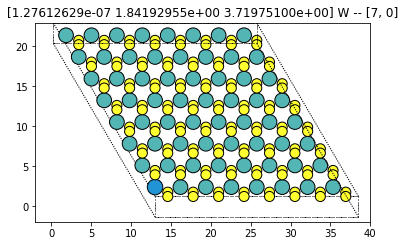

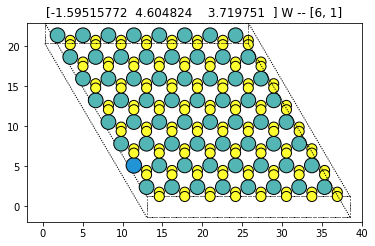

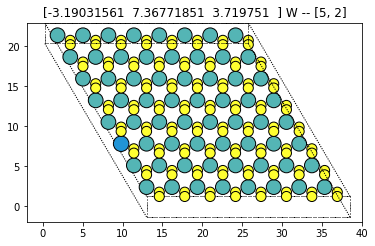

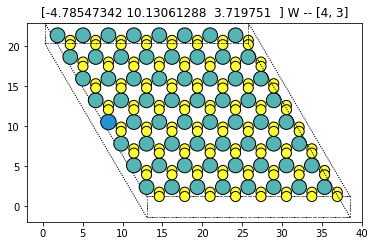

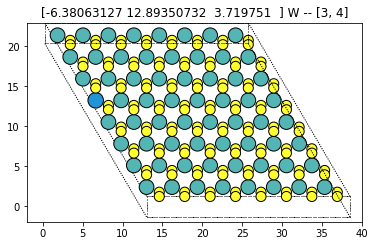

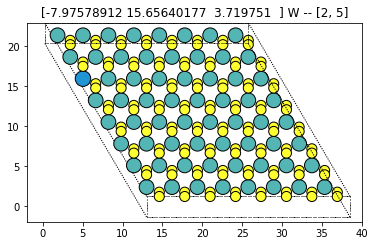

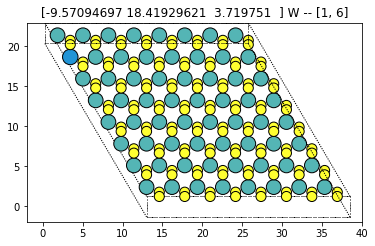

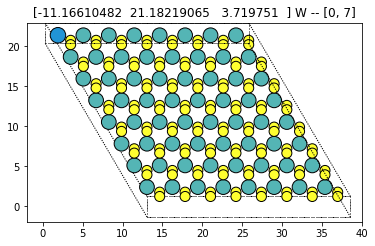

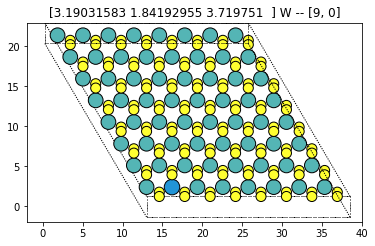

In [54]:
k = 1
for i, d in data.iterrows():
    k += 1
    if k > 10:
        break
    s0 = d.initial_structure
    d0 = d.defect_representation[0]
    ase_atoms = AseAtomsAdaptor.get_atoms(s0)
    fig, ax = plt.subplots()
    plot_atoms(ase_atoms, ax, radii=0.6, rotation=('10x, 0y, 0z'), show_unit_cell=True)
    xlim = 40
    ylim = 23
    ax.set_xlim(-2, xlim)
    ax.set_ylim(-2, ylim)
#     ax.set_axis_off()
    ax.set_title(f'{d0} -- {d.defect_coords}')

In [55]:
def Rand():
    x = np.random.randint(0, 6)
    if x == 0:
        y = np.array([-1, -1])
    elif x == 1:
        y = np.array([-2, 0])
    elif x == 2:
        y = np.array([-1, 1])
    elif x == 3:
        y = np.array([1, 1])
    elif x == 4:
        y = np.array([2, 0])
    elif x == 5:
        y = np.array([1, -1])
    return y

In [57]:
#Создание картинок, на основе которых будет создаваться GIF


# arr = np.array([0, 0])
# for i in range(10):
#     y = Rand()
#     arr = arr + y
#     print(y, end= '___')
#     print(arr)


k = 1
coords = np.array([0, 7])
list_gif = []
while True:
    if k == 1:
        k += 1
        continue
    elif k < 12:
        while True:
            newpos = Rand()
            coords = coords + newpos
            if (coords[0] + coords[1] < 22) and (coords[0] + coords[1] > 6) and (0 < coords[0] < 22) and (0 < coords[1] < 8):
                break
            else:
                coords = coords - newpos
                continue
        k += 1
    else:
        break
        
    for s, d in data.iterrows():
        if (d.defect_coords[0] == coords[0] and d.defect_coords[1] == coords[1]):
            print(d.defect_representation[0], d.defect_coords)
            list_gif.append(d.initial_structure)
            break

[-9.57094697 18.41929621  3.719751  ] W [1, 6]
[-7.97578912 15.65640177  3.719751  ] W [2, 5]
[-6.38063127 12.89350732  3.719751  ] W [3, 4]
[-3.19031557 12.89350732  3.719751  ] W [5, 4]
[1.27612633e-07 1.28935073e+01 3.71975100e+00] W [7, 4]
[-1.59515772 10.13061288  3.719751  ] W [6, 3]
[-4.78547342 10.13061288  3.719751  ] W [4, 3]
[-6.38063127 12.89350732  3.719751  ] W [3, 4]
[-7.97578912 15.65640177  3.719751  ] W [2, 5]
[-9.57094697 18.41929621  3.719751  ] W [1, 6]


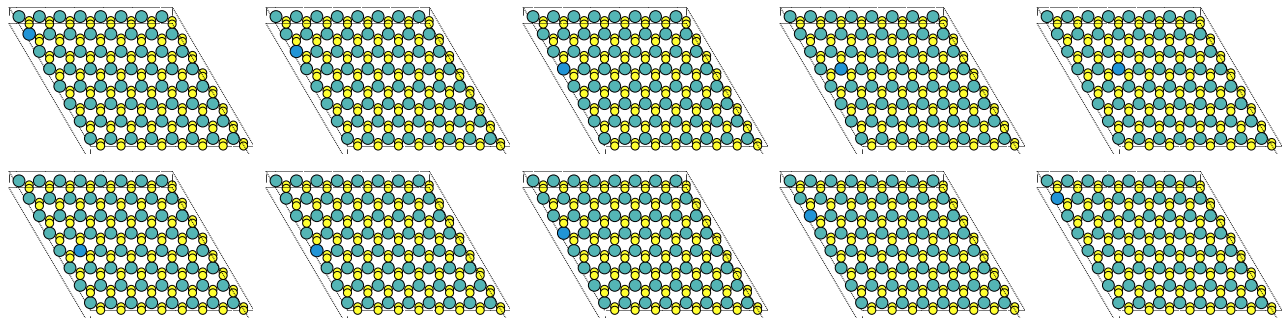

In [58]:
fig, axes = plt.subplots(2, 5, figsize=(18, 5))
# plt.rc('axes', titlesize=18)
# ax.axis('off')
for i in range(10):
    ax = axes[i//5][i%5]
    ase_atoms = AseAtomsAdaptor.get_atoms(list_gif[i])
    plot_atoms(ase_atoms, ax, radii=0.6, rotation=('10x, 0y, 0z'), show_unit_cell=True)
    axes[i//5][i%5].set_axis_off()


plt.tight_layout()